# Телеком

Оператор связи __«Ниединогоразрыва.ком»__ хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. *digital subscriber line*) или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:

- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

## IMPORT

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import phik
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from phik.report import plot_correlation_matrix
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings("ignore")

In [4]:
try:
    personal_new=pd.read_csv('/Users/konstantingrigorev/Desktop/personal_new.csv', index_col='customerID')
except:
    personal_new=pd.read_csv('/datasets/personal_new.csv', index_col='customerID')
try:
    phone_new=pd.read_csv('/Users/konstantingrigorev/Desktop/phone_new.csv', index_col='customerID')
except:
    phone_new=pd.read_csv('/datasets/phone_new.csv', index_col='customerID')
try:
    data_internet=pd.read_csv('/Users/konstantingrigorev/Desktop/internet_new.csv', index_col='customerID')
except:
    data_internet=pd.read_csv('/datasets/internet_new.csv', index_col='customerID')
try:
    data_contract_new=pd.read_csv('/Users/konstantingrigorev/Desktop/contract_new.csv', index_col=['customerID'],
                          parse_dates=['BeginDate', 'EndDate'])
except:
    data_contract_new=pd.read_csv('/datasets/contract_new.csv', index_col=['customerID'],
                          parse_dates=['BeginDate', 'EndDate'])


In [5]:
def get_info(df, name_of_df):
    display(df.head())
    print(f"\nТаблица '{name_of_df}':\n")
    print('Размер датасета:', df.shape)
    print('\nТипы данных полей:')
    display(df.dtypes)
    print('\nПропущенные значения по полям:')
    display(df.isna().sum())

In [6]:
get_info(data_contract_new, 'contract')


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



Таблица 'contract':

Размер датасета: (7043, 7)

Типы данных полей:


BeginDate           datetime64[ns]
EndDate                     object
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges                object
dtype: object


Пропущенные значения по полям:


BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [7]:
get_info(data_internet, 'internet')


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No



Таблица 'internet':

Размер датасета: (5517, 7)

Типы данных полей:


InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object


Пропущенные значения по полям:


InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [8]:
get_info(phone_new, 'phone')


,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes



Таблица 'phone':

Размер датасета: (6361, 1)

Типы данных полей:


MultipleLines    object
dtype: object


Пропущенные значения по полям:


MultipleLines    0
dtype: int64

In [9]:
get_info(personal_new, 'personal')


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No



Таблица 'personal':

Размер датасета: (7043, 4)

Типы данных полей:


gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object


Пропущенные значения по полям:


gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [10]:
data_contract_new

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2
2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4
4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6


### Вывод по первому осмотру

Во всех таблицах отсутсвуют пропуски остальных отличается.
Во всех таблицах присутсвуют бинарные признаки со значениями 'Yes'/'No', 0 / 1.
Во всех таблицах выявлены дубликаты, но это вероятнее всего обусловлено тем, что ID клиентов мы перевели в индекс.
В таблице contract:

Поля даты приведены с периодичностью в месяц.
Проблема в поле TotalCharges, при считывании тип поля определился строковым, там есть нечисловые значения
Отсутвует целевой признак - флаг, разорвал ли клиент контракт, его можно извлечь из поля EndDate - даты окончания контракта


Необходимо:

изменить тип данных по столбцам, где это необходимо
проанализировать данные на наличие аномалий и ошибок

## EDA

In [11]:
#data_contract_new['Left'] = data_contract_new['EndDate'].apply(lambda x: 'No' if x == 'No' else 'Yes')
data_contract_new['Left'] = (data_contract_new['EndDate'] != 'No').astype(int)

data_contract_new['BeginDate'] = pd.to_datetime(data_contract_new['BeginDate'])

data_contract_new['MonthlyCharges'] = data_contract_new['MonthlyCharges'].astype(float)

data_contract_new['EndDate'] = data_contract_new['EndDate'].where(data_contract_new['EndDate'] != 'No', '2020-02-01')

data_contract_new['EndDate'] = pd.to_datetime(data_contract_new['EndDate'])

data_contract_new.loc[data_contract_new['TotalCharges'] == " ", 'TotalCharges'] = 0
data_contract_new['TotalCharges'] = data_contract_new['TotalCharges'].astype(float)


data_contract_new

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Left
customerID,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0
...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.20,0
2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.40,0
4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.60,0


In [12]:
data_contract_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   Left              7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 495.2+ KB


- Создаю новый столбец Left. Если EndDate не равен 'No', то значение будет 1 (что означает, что клиент ушел). В противном случае значение будет 0 (клиент остался). 
- Преобразую значения в столбце BeginDate в формат datetime. 
- изменяю тип данных столбца MonthlyCharges на float. 
- заменяю все значения 'No' в столбце EndDate на дату '2020-02-01'. 
- преобразую значения в столбце EndDate в формат datetime, чтобы работать с ними как с датами.
 ### В результате этих шагов датафрейм data_contract_new подготовлен для анализа.

In [13]:
data_contract_new['Left'].value_counts()

0    5942
1    1101
Name: Left, dtype: int64

Смотрим соотношение нашего таргета

In [14]:
data_contract_new.describe()

,MonthlyCharges,TotalCharges,Left
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.312885,0.156325
std,30.090047,2112.742814,0.363189
min,18.250000,0.000000,0.000000
25%,35.500000,436.750000,0.000000
50%,70.350000,1343.350000,0.000000
75%,89.850000,3236.690000,0.000000
max,118.750000,9221.380000,1.000000


С этим в целом всё хорощо, ничего особо выделяющего нету

In [15]:
def plot_dataset(df):
    sns.set(style="whitegrid")
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number', 'datetime']).columns
    date_cols = df.select_dtypes(include=['datetime']).columns
    
    for col in numeric_cols:
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
        
        sns.histplot(df[col], kde=True, ax=axs[0])
        axs[0].set_title(f'Гистограмма для {col}')
        axs[0].set_xlabel(col)
        axs[0].set_ylabel('Частота')
        
        sns.boxplot(y=df[col], ax=axs[1])
        axs[1].set_title(f'Ящик с усами для {col}')
        axs[1].set_xlabel('')
        axs[1].set_ylabel(col)
        
        plt.tight_layout()
        plt.show()
    
    num_categorical_cols = len(categorical_cols)
    for i in range(0, num_categorical_cols, 2):
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
        
        if i < num_categorical_cols:
            df[categorical_cols[i]].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axs[0])
            axs[0].set_title(f'Круговая диаграмма для {categorical_cols[i]}')
            axs[0].set_ylabel('')
        
        if i+1 < num_categorical_cols:
            df[categorical_cols[i+1]].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axs[1])
            axs[1].set_title(f'Круговая диаграмма для {categorical_cols[i+1]}')
            axs[1].set_ylabel('')
        
        plt.tight_layout()
        plt.show()
    
    for col in date_cols:
        fig, ax = plt.subplots(figsize=(14, 6))
        df[col].value_counts().sort_index().plot(ax=ax)
        ax.set_title(f'Распределение по времени для {col}')
        ax.set_xlabel('Дата')
        ax.set_ylabel('Частота')
        plt.tight_layout()
        plt.show()

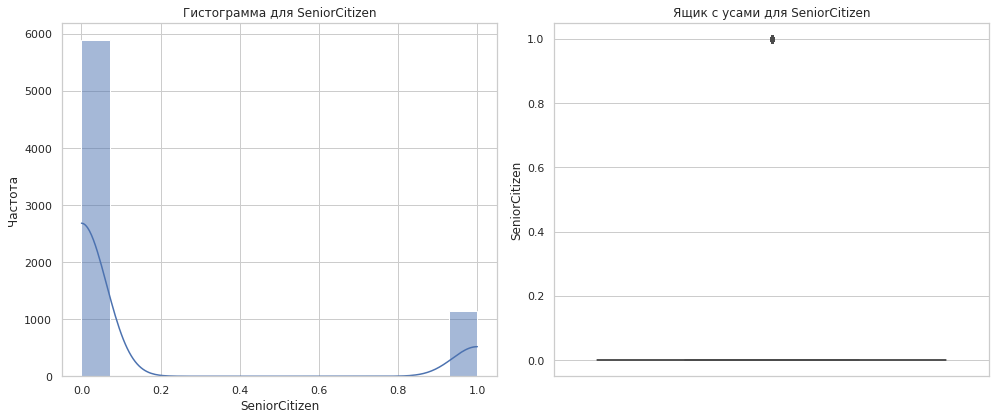

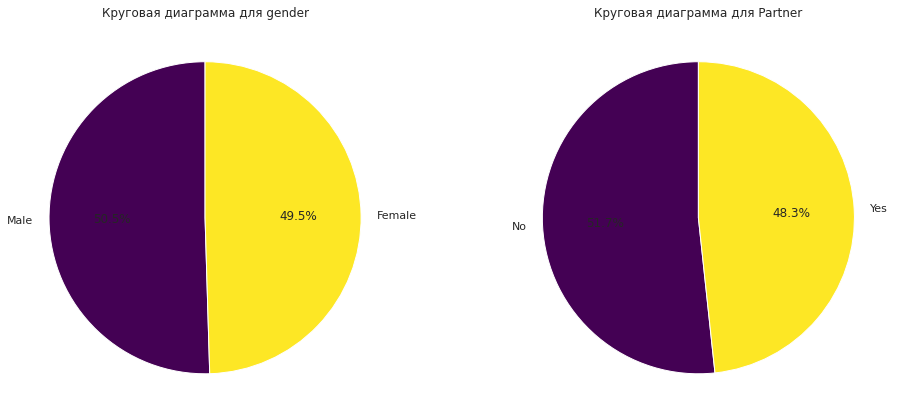

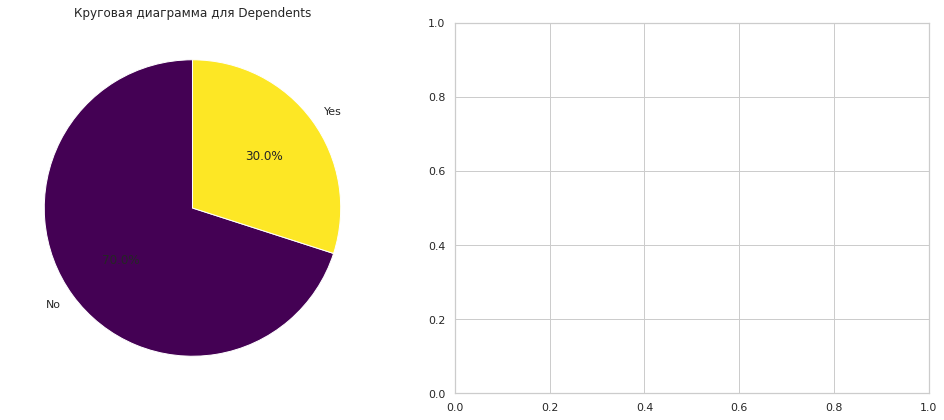

In [16]:
plot_dataset(personal_new)

Из графиков видно что:
- Большинство молодых пользуется сетью
- практически одинаковое количество мужчин и женщин
- Практически одинаковое соотношение женатых и нет
- Большинство клиентов без детей


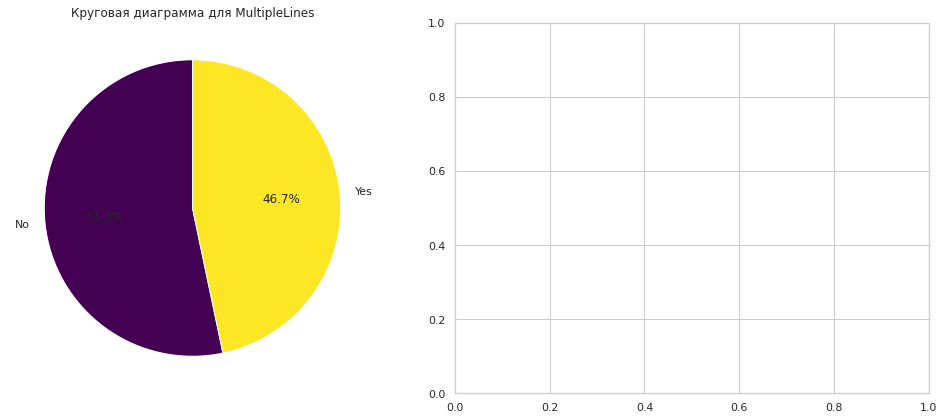

In [17]:
plot_dataset(phone_new)

Практически одинаковое соотношение людей у которых подключение телефона к нескольким линиям одновременно.


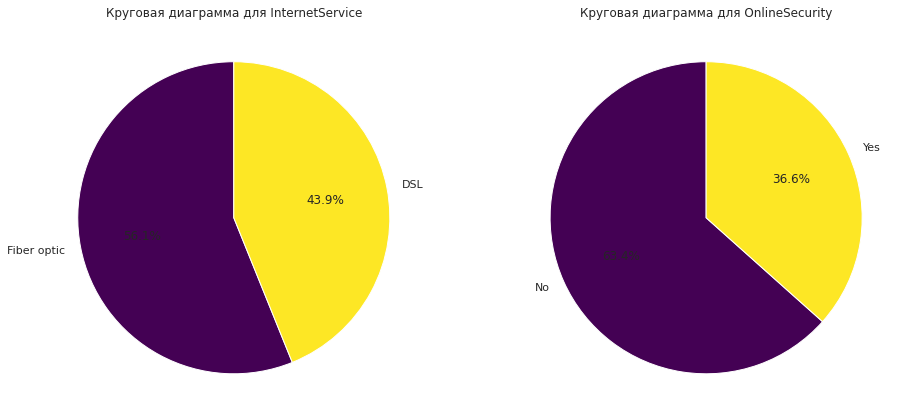

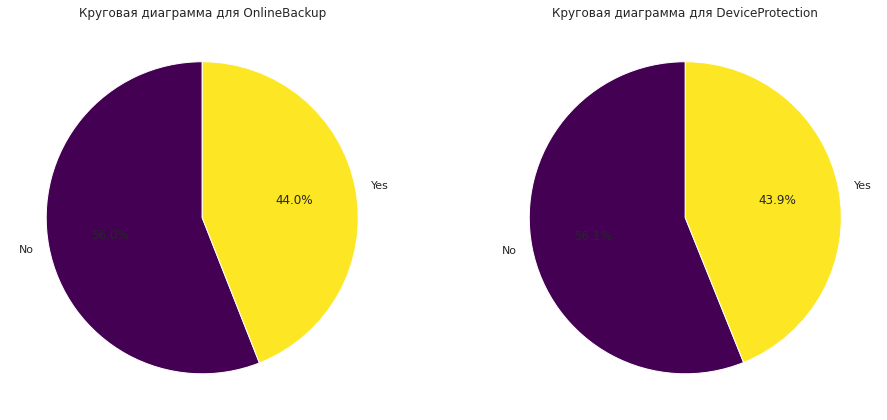

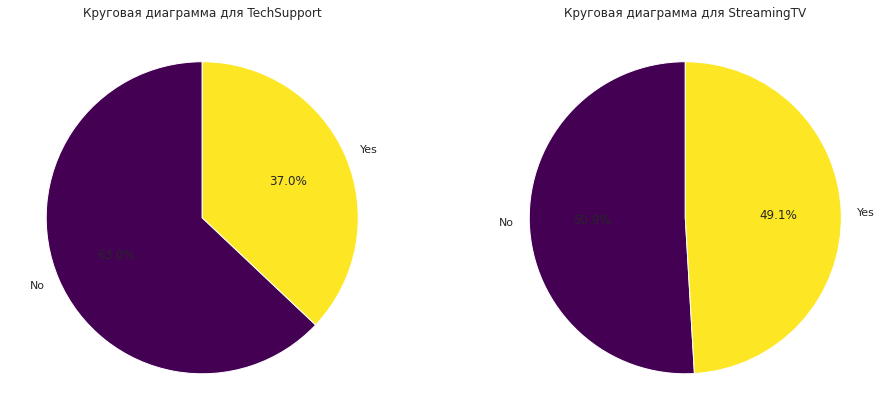

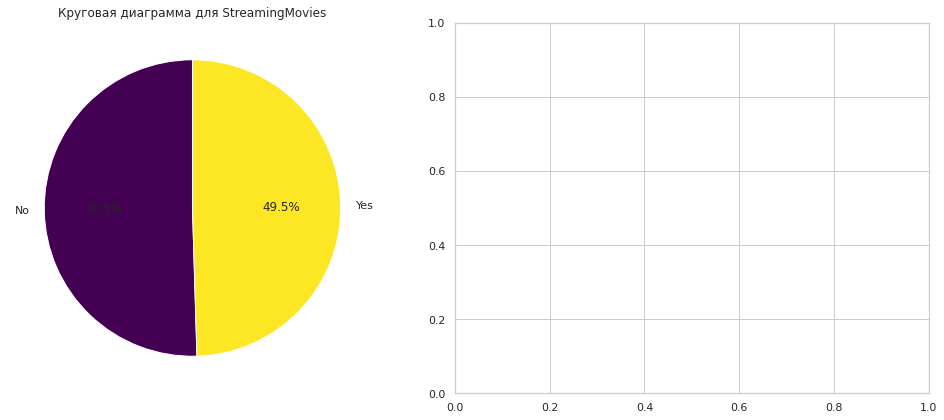

In [18]:
plot_dataset(data_internet)

Из этого видим, что:
- Большинство пользуется оптоволокном
- Многое количество дополнительных услуг особо не пользуется спросом, кроме допов подключаемых для телевизора, там примерно поровну по людям

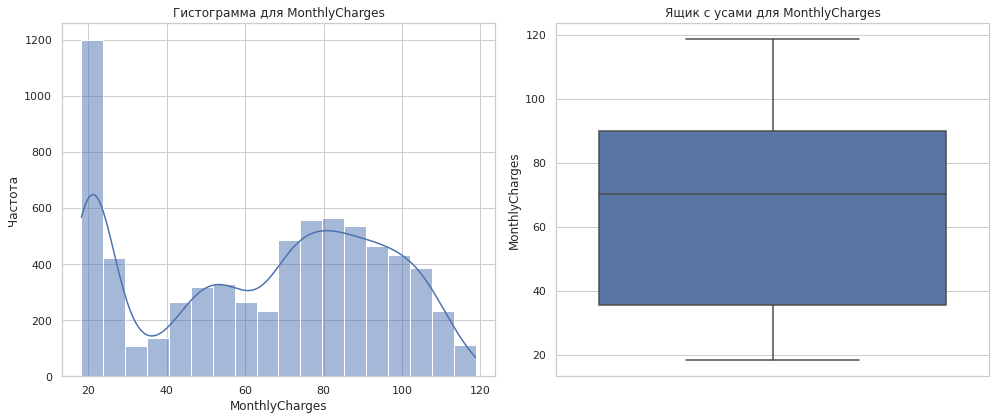

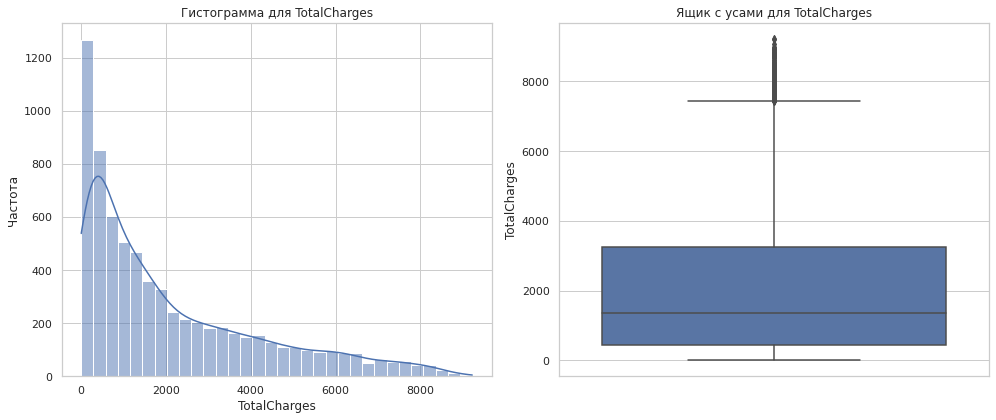

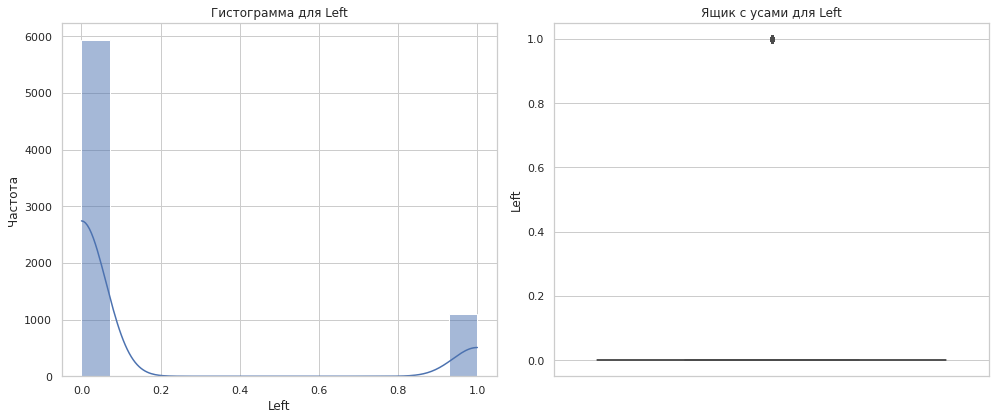

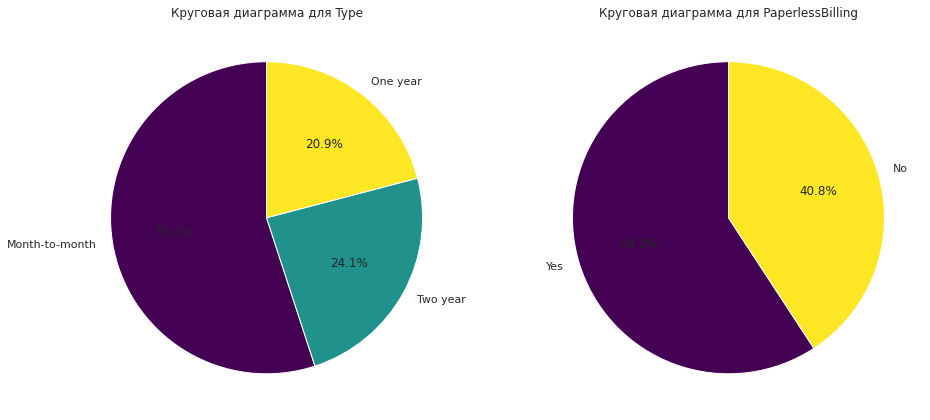

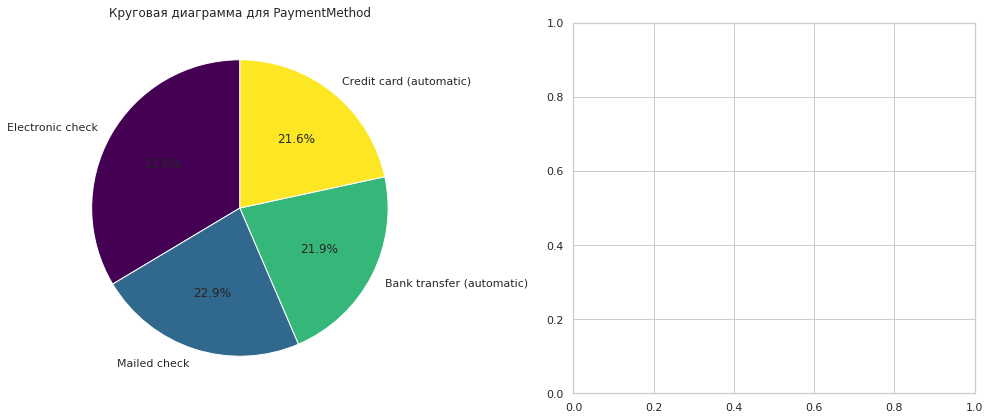

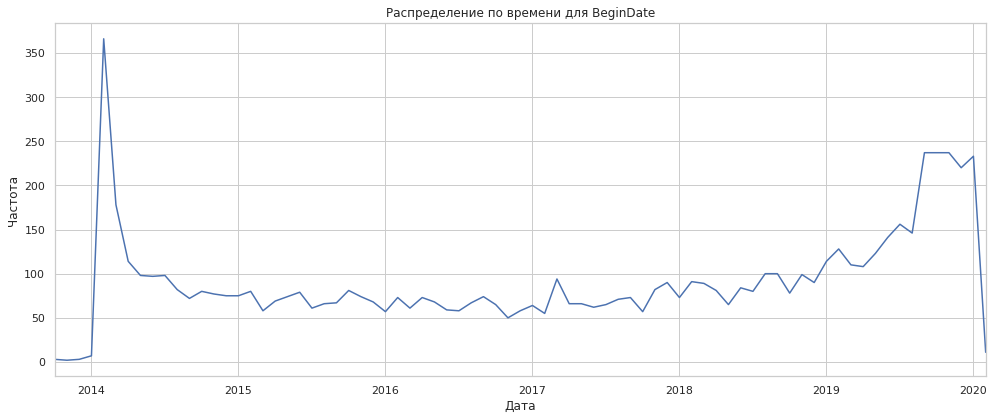

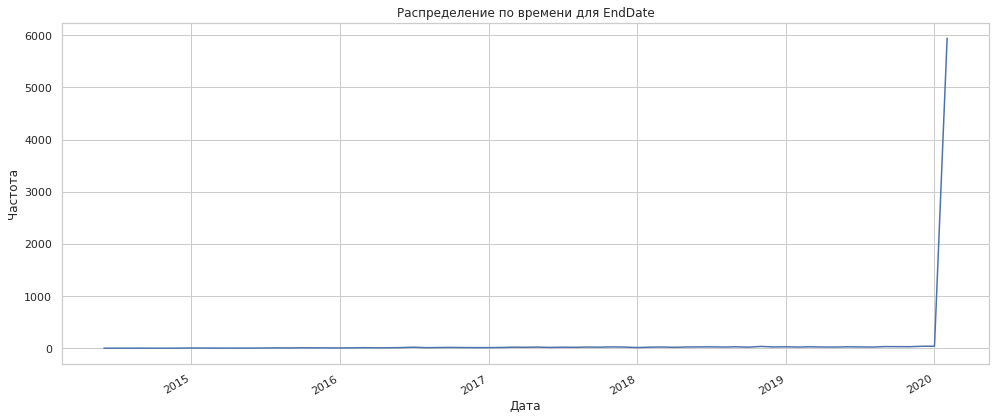

In [19]:
plot_dataset(data_contract_new)

Из этого видим что: 
-  расходы за месяц сильно разняться, большинство платит минмальную цену за сеть, возомжно из-за новых акций или перехода на новые тарифы где дают скидки, а дальше скачек уже на довольно дорогие тарифы, где уже больше функцию и плющек
- По общим расходом всё нормально, большинство хочет тратить минимально возможоне количество денег на связь
- Большинство клиентов не ушло
- Большинтсов платит раз месяц, потому что у нас не любят платить раз за год, потому что дорого, хотя это выгодней
- Способ оплаты примерно одинаковый

## Соединение таблиц

In [20]:
df = data_contract_new.merge(personal_new, on='customerID', how='outer') \
                     .merge(data_internet, on='customerID', how='outer') \
                     .merge(phone_new, on='customerID', how='outer')
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Left,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   Left              7043 non-null   int64         
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup  

Видим пропуски изза разных айдишников

In [22]:
df['MultipleLines'].fillna('no_phone', inplace = True)

In [23]:
df.fillna('no_internet', inplace = True)


Добавляем эти два пункта как заглушки

In [24]:
df['Period'] = (df['EndDate'] - df['BeginDate']).dt.days


Делаем новый показатель

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   Left              7043 non-null   int64         
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup  

Пропусков теперь нету

In [26]:
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Left,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Period
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,0,...,No,DSL,No,Yes,No,No,No,No,no_phone,31
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,1036
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,123
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,no_phone,1371
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,153


In [27]:
cat_features= ['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'gender', 'Partner', 'Dependents', 'MultipleLines']
numeric_features = ['MonthlyCharges', 'Period']


In [28]:
interval_cols = ['MonthlyCharges', 'TotalCharges', 'Period', 'period_payment', 'Left']
phik_overview = df.phik_matrix(interval_cols = interval_cols)


In [29]:
for i in df.columns:
    if df[i].dtype == 'object':
        cat_features.append(i)
    elif df[i].dtype == 'float64':
        numeric_features.append(i)
print(cat_features, numeric_features)

['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'Partner', 'Dependents', 'MultipleLines', 'Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'] ['MonthlyCharges', 'Period', 'MonthlyCharges', 'TotalCharges']


In [30]:
sns.set_style("darkgrid")
sns.set_palette("dark")


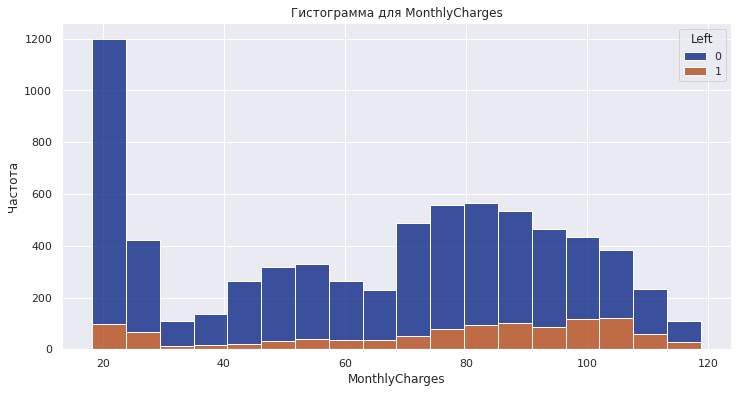

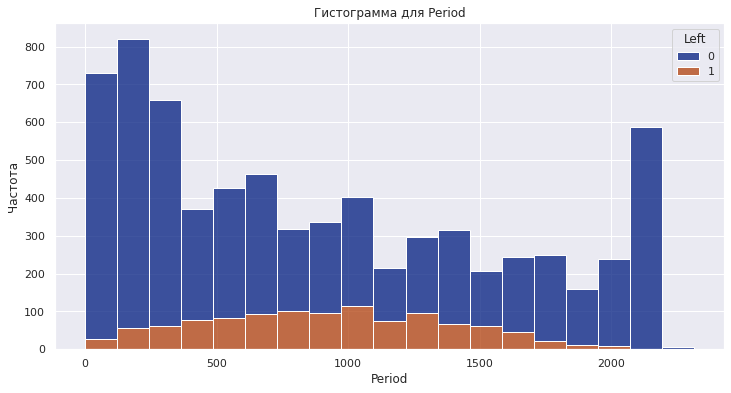

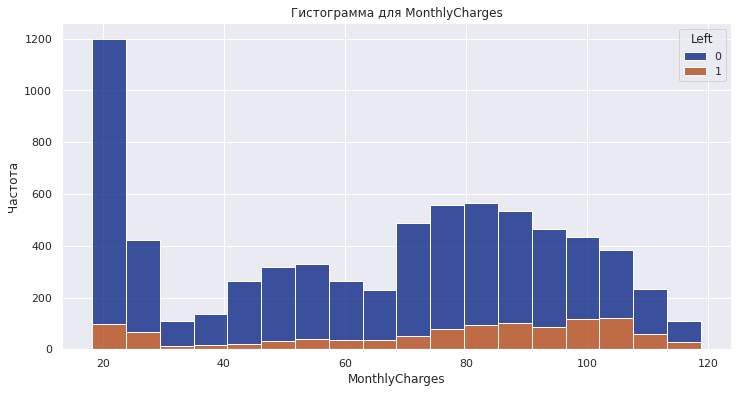

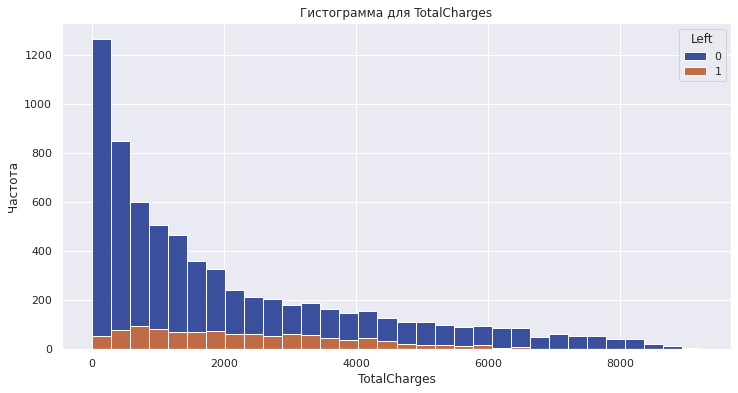

In [31]:
for column in numeric_features:    
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=column, hue='Left', multiple="stack")
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для {column}')
    plt.show()

Согласно графикам, вероятность ухода клиентов значительно ниже при оплате за год или два года вперёд по сравнению с ежемесячной оплатой. Также клиенты, использующие наличный расчёт, уходят реже. У клиентов, которые ушли, ежемесячные расходы выше, чем у оставшихся, но суммарные расходы выше у тех, кто остался.

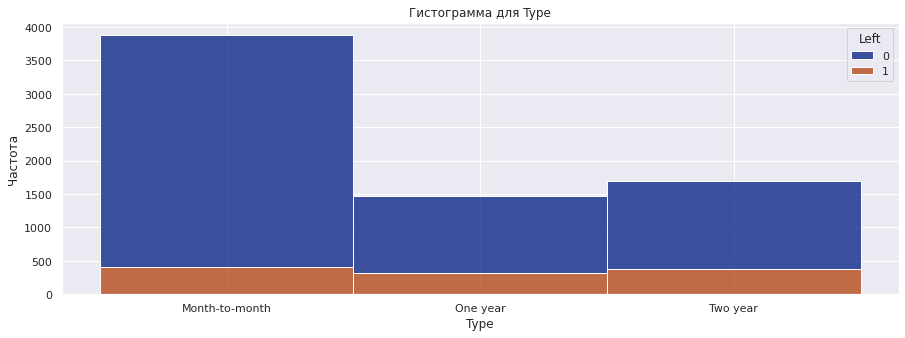

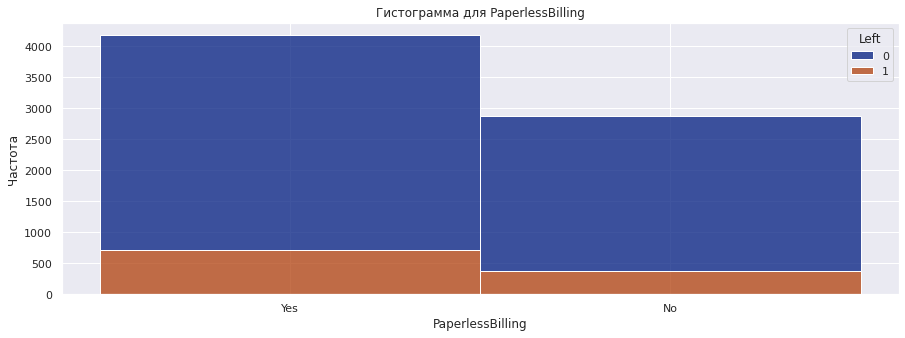

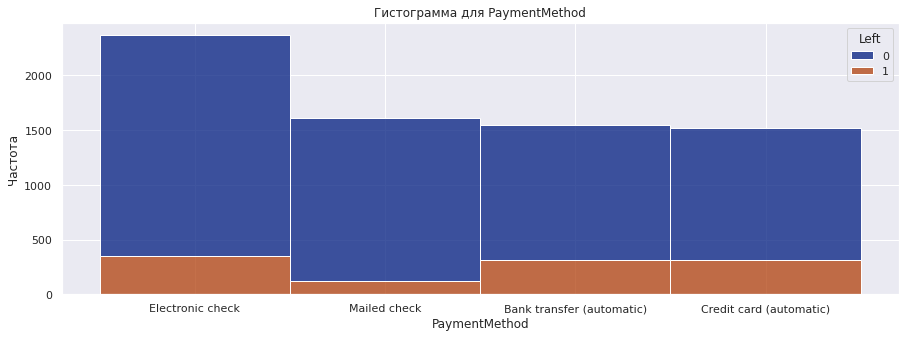

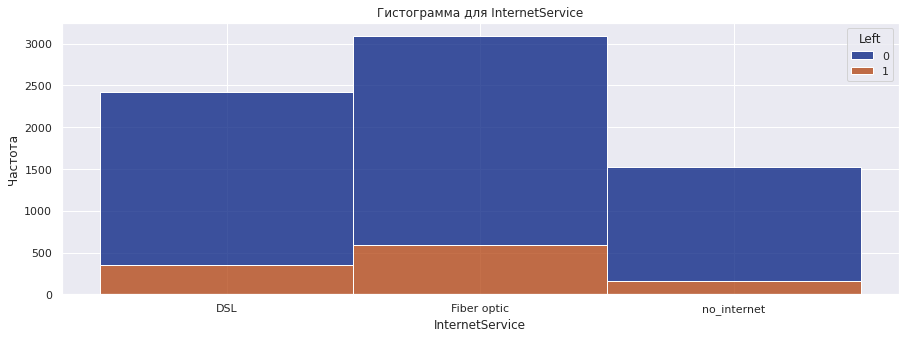

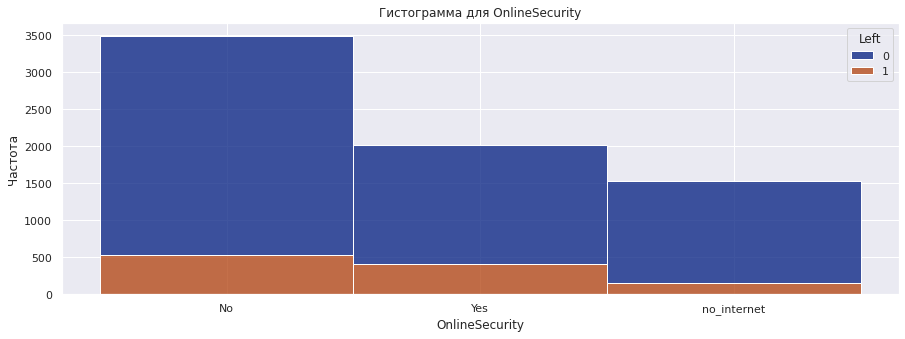

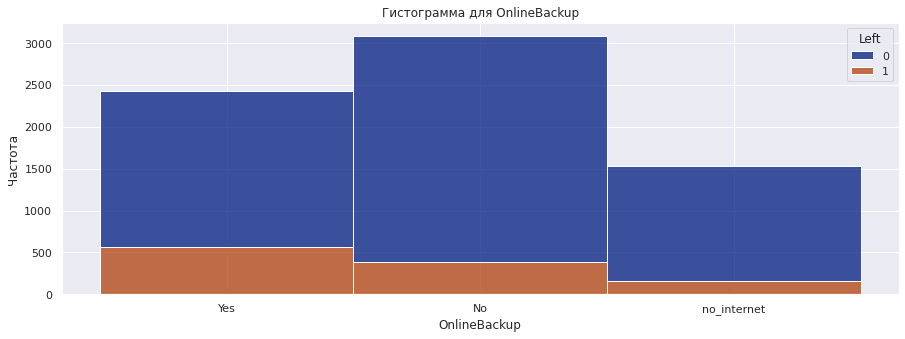

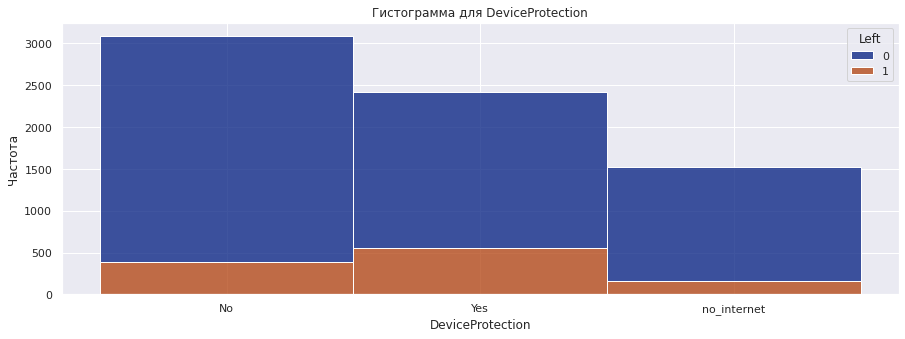

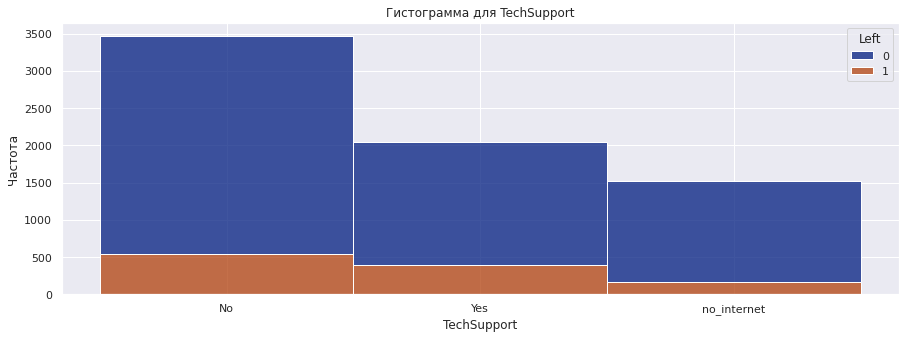

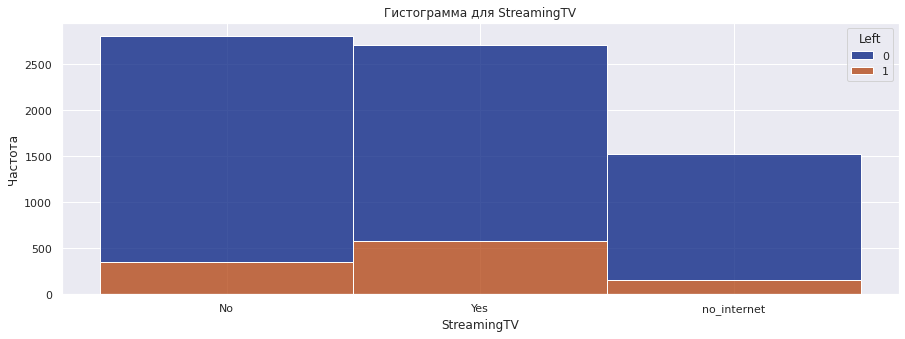

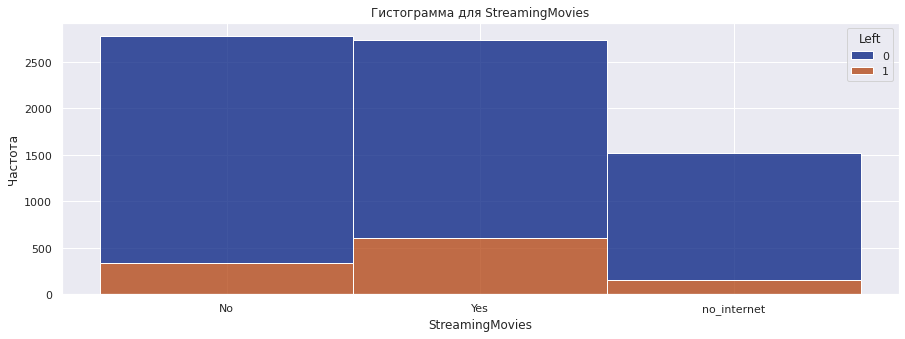

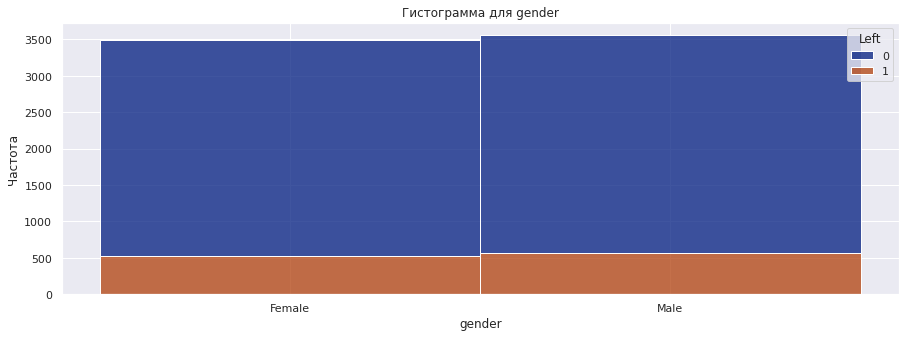

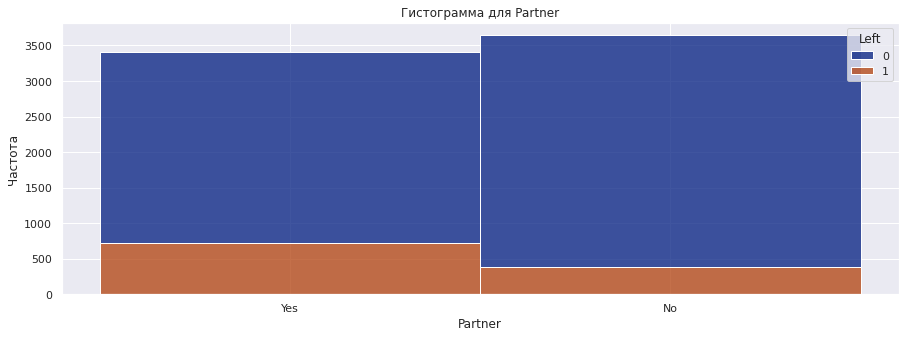

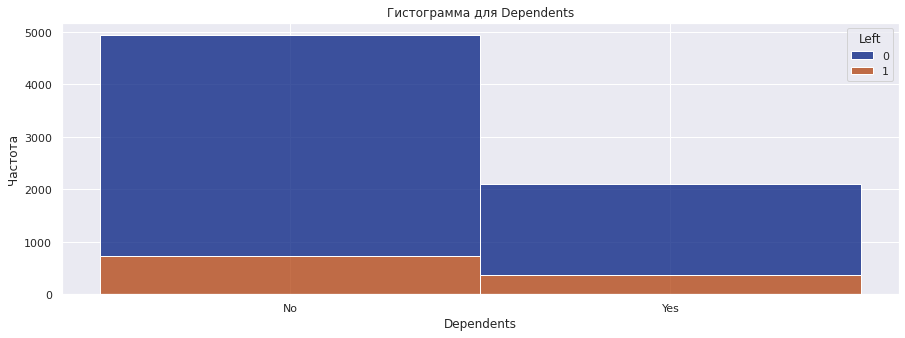

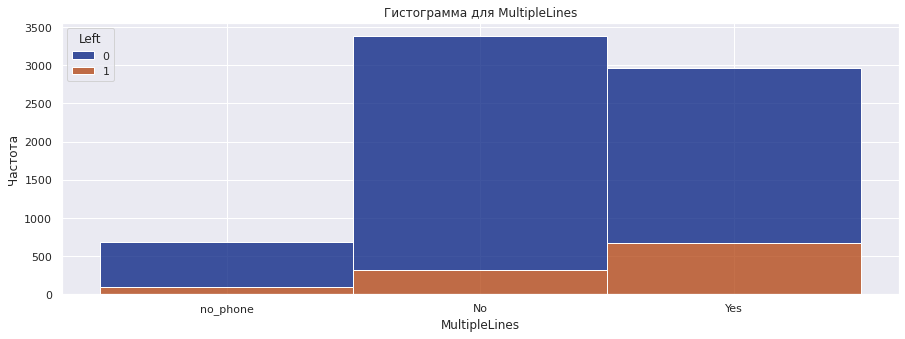

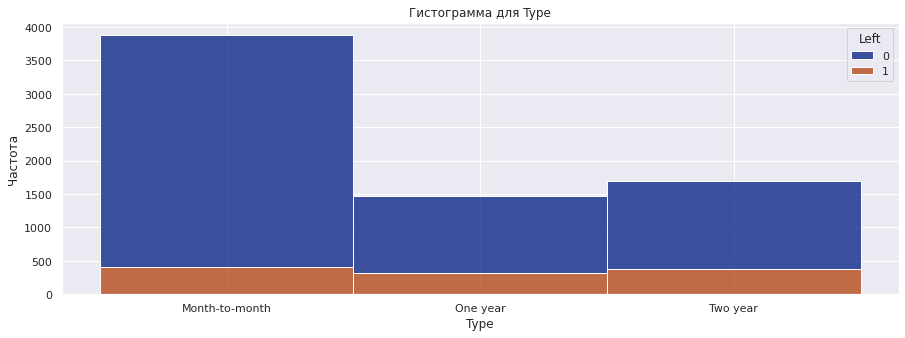

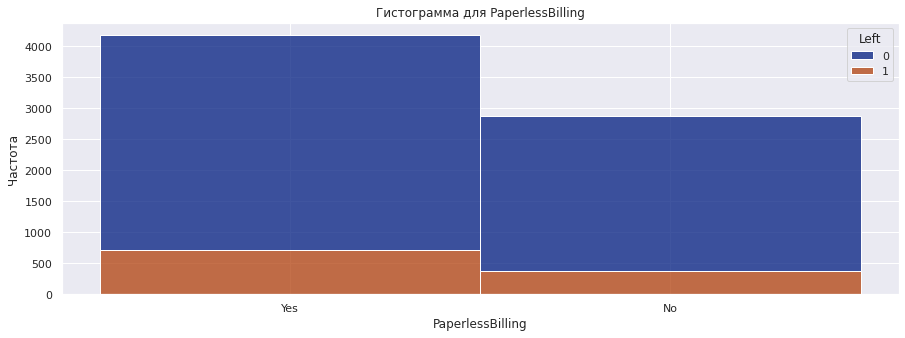

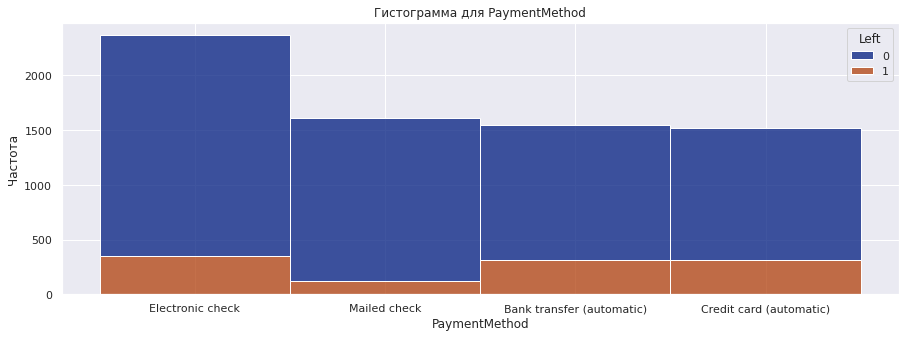

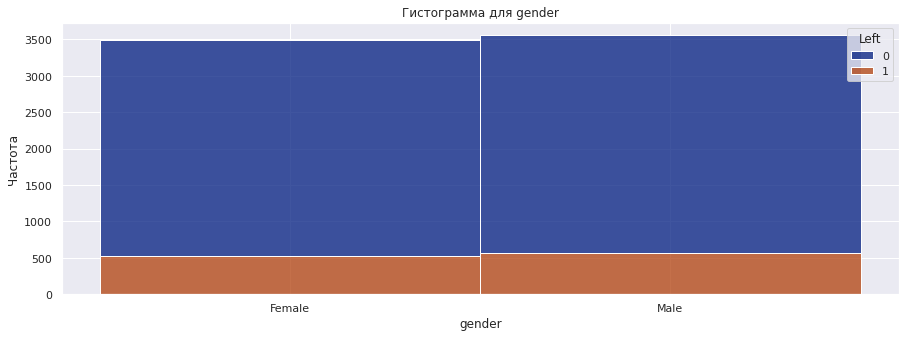

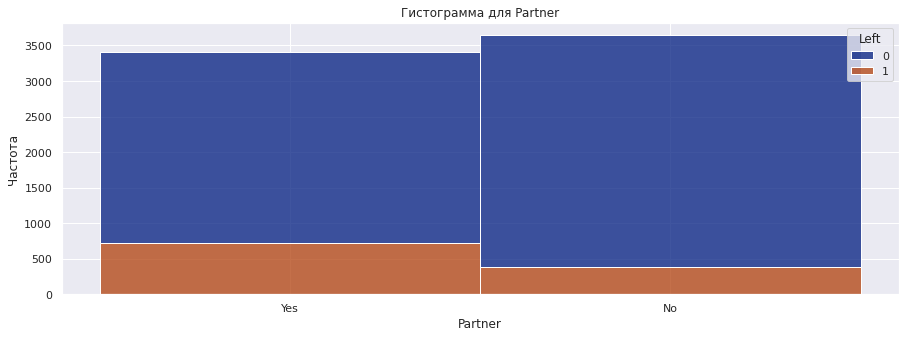

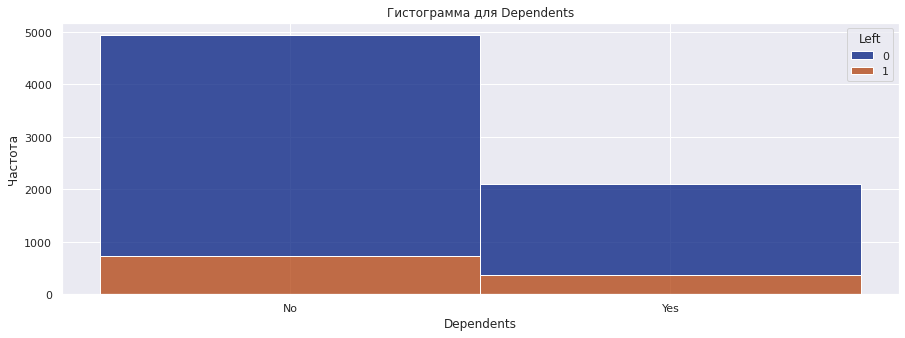

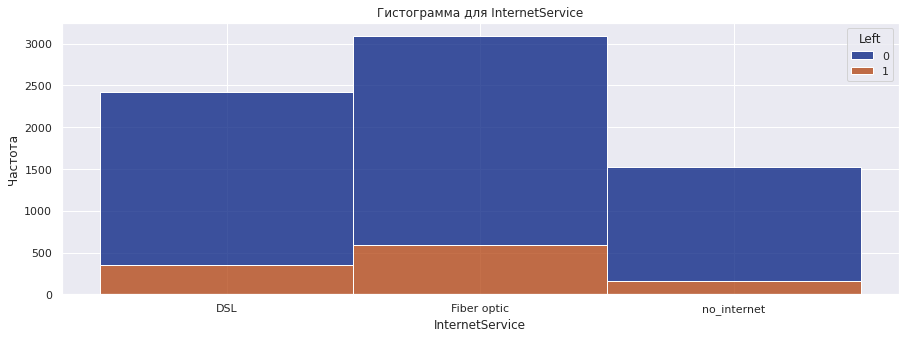

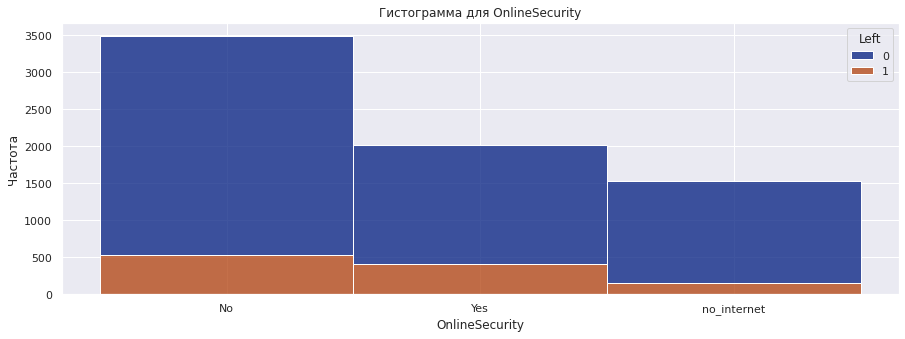

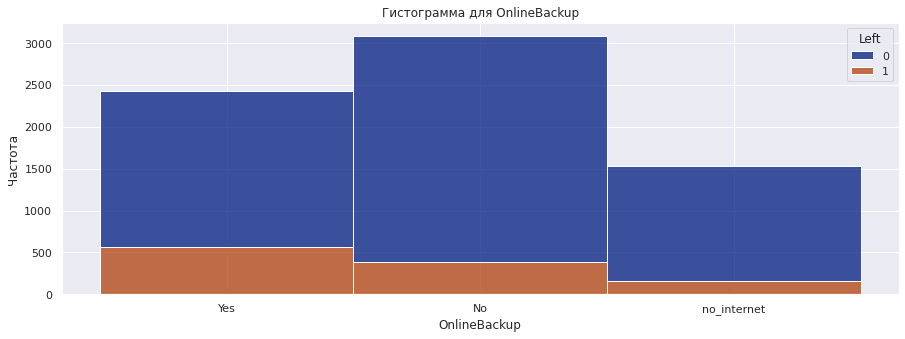

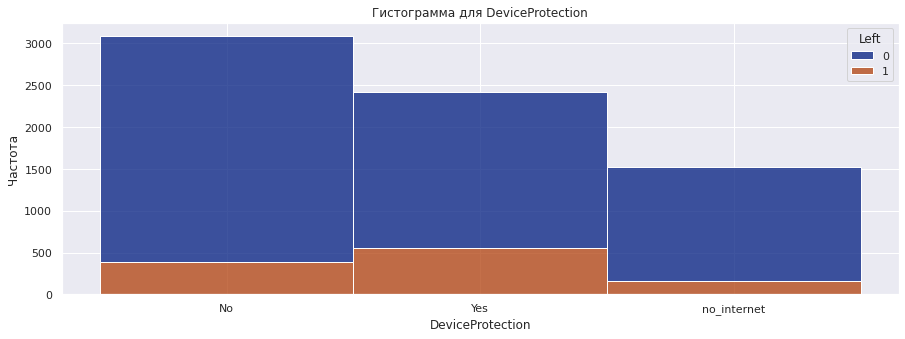

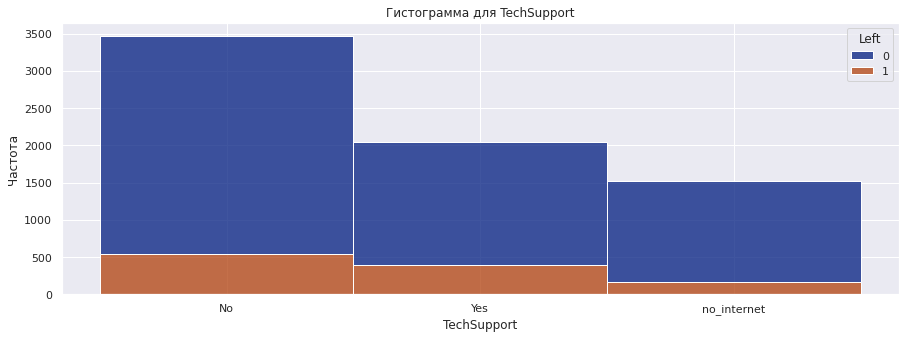

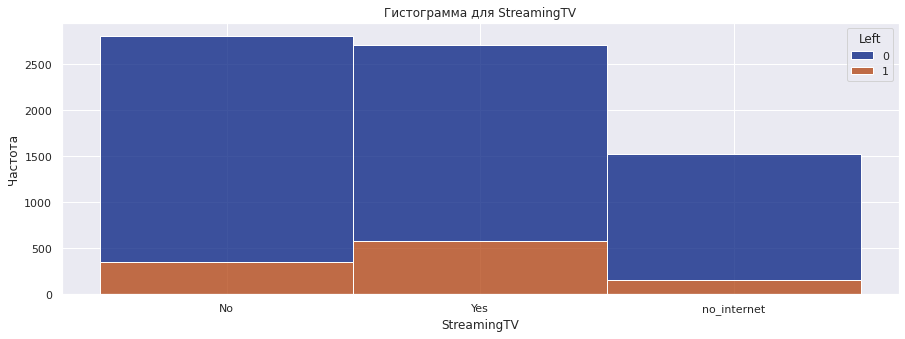

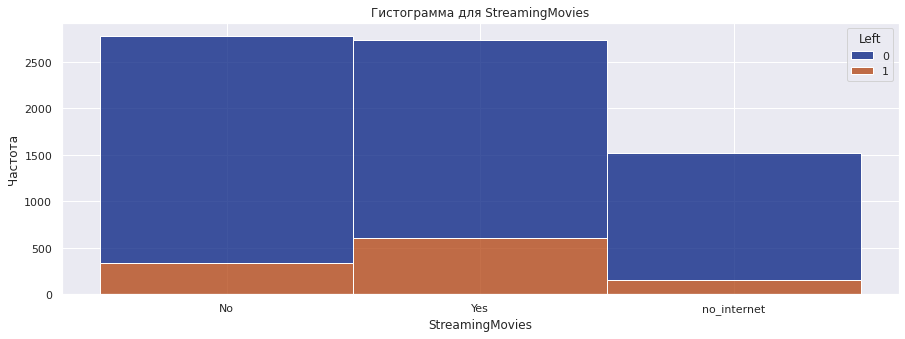

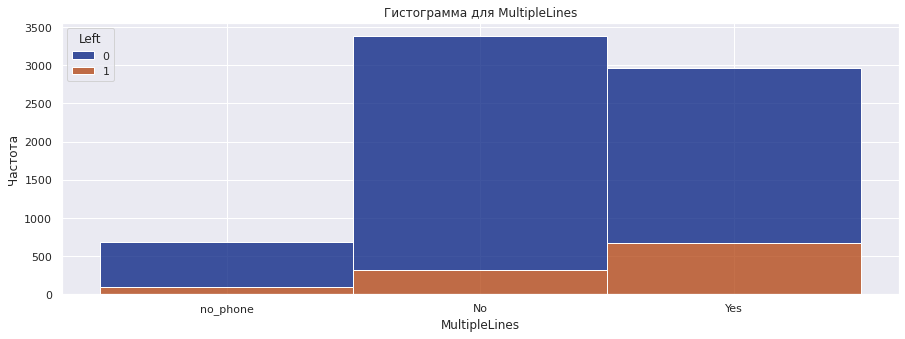

In [32]:
for column in cat_features:    
    plt.figure(figsize=(15, 5))
    sns.histplot(data=df, x=column, hue='Left', multiple="stack")
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для {column}')
    plt.show()

Глядя на графики, можно заметить, что вероятность ухода клиентов с годовым или двухлетним планом оплаты значительно ниже, чем у тех, кто платит ежемесячно. Также клиенты, предпочитающие наличный расчет, реже уходят. При этом пол клиента практически не оказывает влияния на целевую переменную.
- В остальном не могу особо что-то выделить

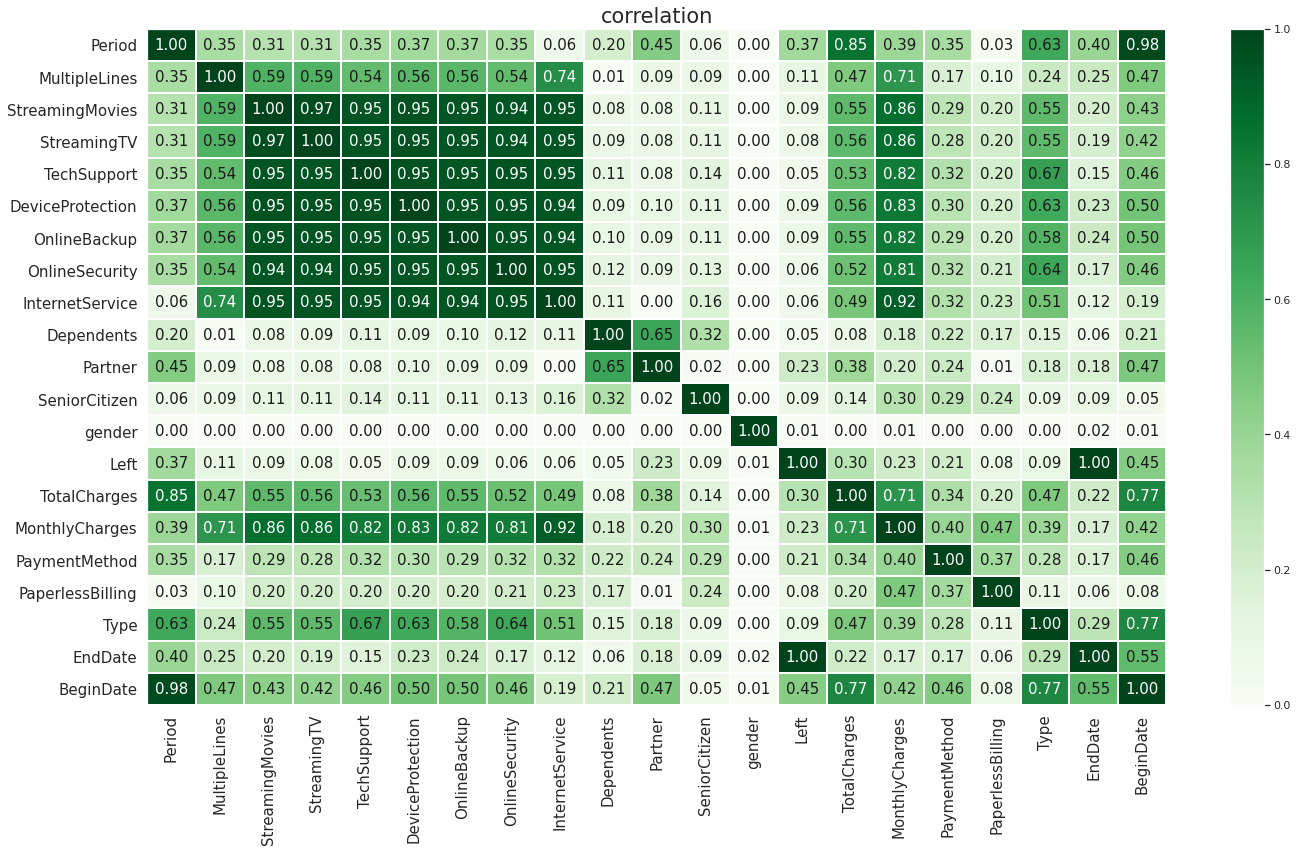

In [33]:
plot_correlation_matrix(phik_overview.values, 
                       x_labels = phik_overview.columns,
                       y_labels = phik_overview.index,
                       vmin = 0,
                       vmax = 1,
                       color_map= "Greens",
                       fontsize_factor = 1.5,
                       figsize = (20, 12))
plt.show();

### Матрица корреляции

Еще раз просматриваем на наличие чего-то аномального, но тут такого нету

In [34]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'Left', 'SeniorCitizen', 'Period']


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Left,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Period
BeginDate,1.00,0.55,0.77,0.08,0.46,0.42,0.77,0.45,0.01,0.05,...,0.21,0.19,0.46,0.50,0.50,0.46,0.42,0.43,0.47,0.98
EndDate,0.55,1.00,0.29,0.06,0.17,0.17,0.22,1.00,0.02,0.09,...,0.06,0.12,0.17,0.24,0.23,0.15,0.19,0.20,0.25,0.40
Type,0.77,0.29,1.00,0.11,0.28,0.39,0.47,0.09,0.00,0.09,...,0.15,0.51,0.64,0.58,0.63,0.67,0.55,0.55,0.24,0.63
PaperlessBilling,0.08,0.06,0.11,1.00,0.37,0.47,0.20,0.08,0.00,0.24,...,0.17,0.23,0.21,0.20,0.20,0.20,0.20,0.20,0.10,0.03
PaymentMethod,0.46,0.17,0.28,0.37,1.00,0.40,0.34,0.21,0.00,0.29,...,0.22,0.32,0.32,0.29,0.30,0.32,0.28,0.29,0.17,0.35
MonthlyCharges,0.42,0.17,0.39,0.47,0.40,1.00,0.71,0.23,0.01,0.30,...,0.18,0.92,0.81,0.82,0.83,0.82,0.86,0.86,0.71,0.39
TotalCharges,0.77,0.22,0.47,0.20,0.34,0.71,1.00,0.30,0.00,0.14,...,0.08,0.49,0.52,0.55,0.56,0.53,0.56,0.55,0.47,0.85
Left,0.45,1.00,0.09,0.08,0.21,0.23,0.30,1.00,0.01,0.09,...,0.05,0.06,0.06,0.09,0.09,0.05,0.08,0.09,0.11,0.37
gender,0.01,0.02,0.00,0.00,0.00,0.01,0.00,0.01,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SeniorCitizen,0.05,0.09,0.09,0.24,0.29,0.30,0.14,0.09,0.00,1.00,...,0.32,0.16,0.13,0.11,0.11,0.14,0.11,0.11,0.09,0.06


В вашем наборе данных дата начала контракта сильно связана с датой окончания, типом услуги, общими затратами и периодом контракта. Дата окончания сильно связана с уходом клиентов. Тип услуги и месячные затраты сильно коррелируют с типом интернета и дополнительными услугами. Общие затраты связаны с датой начала контракта, месячными затратами и периодом контракта. Тип интернета и дополнительные услуги сильно коррелируют между собой и с месячными затратами. Период контракта связан с датой начала, общими затратами и типом услуги.

# Обучение модели

In [35]:
df = df.drop(['BeginDate', 'EndDate', 'TotalCharges'], axis=1)
cat_features= ['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'gender', 'Partner', 'Dependents', 'MultipleLines']

Убираем три признака, даты и общуюю получку они больше всего коррелирует со всем остальным.

In [36]:
RANDOM_STATE = 200524
test_size = 0.25

### Разделяем выборку

In [37]:
numeric_features = ['MonthlyCharges', 'Period']
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Left', axis=1), df['Left'], test_size=0.25, 
    random_state=RANDOM_STATE 
) 
print('Обучающая выборка: ', x_train.shape, y_train.shape)
print('Тренировочная выборка: ', x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train[numeric_features] = pd.DataFrame(
    scaler.fit_transform(x_train[numeric_features]),
    columns=numeric_features, index=x_train.index
)
x_test[numeric_features] = pd.DataFrame(
    scaler.transform(x_test[numeric_features]),
    columns=numeric_features, index=x_test.index
)

Обучающая выборка:  (5282, 17) (5282,)
Тренировочная выборка:  (1761, 17) (1761,)


In [38]:
cv_params = {'scoring': 'roc_auc',
             'return_train_score': True,
             'cv': 4}

### LogisticRegression

In [39]:
%%time



pipe = Pipeline([
    ('ohe', ColumnTransformer(
        transformers=[('ohe', OneHotEncoder(sparse_output=False, drop='first'), cat_features)],
        verbose_feature_names_out=False, remainder='passthrough')),
    ('clf', LogisticRegression(random_state=RANDOM_STATE, max_iter=500))
])

params = {
    'clf__solver': ['lbfgs', 'liblinear'],
    'clf__C': np.logspace(-3, 3, 7),
    'clf__class_weight': [None, 'balanced']
}
cv_params.pop('scoring', None)
grid_lr = GridSearchCV(pipe, params, scoring='roc_auc', **cv_params, n_jobs=-1)

grid_lr.fit(x_train, y_train)

print("Лучшие параметры модели: ", grid_lr.best_params_)
print("Лучший результат кросс-валидации: ", grid_lr.best_score_)

results = grid_lr.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean test score: {mean_score:.3f} | Parameters: {params}")

Лучшие параметры модели:  {'clf__C': 1.0, 'clf__class_weight': None, 'clf__solver': 'lbfgs'}
Лучший результат кросс-валидации:  0.7455367456417552
Mean test score: 0.681 | Parameters: {'clf__C': 0.001, 'clf__class_weight': None, 'clf__solver': 'lbfgs'}
Mean test score: 0.474 | Parameters: {'clf__C': 0.001, 'clf__class_weight': None, 'clf__solver': 'liblinear'}
Mean test score: 0.691 | Parameters: {'clf__C': 0.001, 'clf__class_weight': 'balanced', 'clf__solver': 'lbfgs'}
Mean test score: 0.681 | Parameters: {'clf__C': 0.001, 'clf__class_weight': 'balanced', 'clf__solver': 'liblinear'}
Mean test score: 0.729 | Parameters: {'clf__C': 0.01, 'clf__class_weight': None, 'clf__solver': 'lbfgs'}
Mean test score: 0.677 | Parameters: {'clf__C': 0.01, 'clf__class_weight': None, 'clf__solver': 'liblinear'}
Mean test score: 0.735 | Parameters: {'clf__C': 0.01, 'clf__class_weight': 'balanced', 'clf__solver': 'lbfgs'}
Mean test score: 0.730 | Parameters: {'clf__C': 0.01, 'clf__class_weight': 'balanced

### RandomForestClassifier

In [40]:
%%time


pipe = Pipeline([
    ('ohe', ColumnTransformer(
        transformers=[('ohe', OneHotEncoder(sparse_output=False, drop='first'), cat_features)],
        verbose_feature_names_out=False, remainder='passthrough')),
    ('clf', RandomForestClassifier(random_state=RANDOM_STATE))
])

params = {
    'clf__max_depth': range(4, 21, 4),
    'clf__min_samples_leaf': range(1, 11, 1),
    'clf__n_estimators': [10, 50, 100],
    'clf__class_weight': [None, 'balanced']
}

grid_rf = RandomizedSearchCV(pipe, params, scoring='roc_auc', **cv_params, n_jobs=-1)

grid_rf.fit(x_train, y_train)

print("Лучшие параметры модели: ", grid_rf.best_params_)
print("Лучший результат кросс-валидации: ", grid_rf.best_score_)

results = grid_rf.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean test score: {mean_score:.3f} | Parameters: {params}")


Лучшие параметры модели:  {'clf__n_estimators': 50, 'clf__min_samples_leaf': 6, 'clf__max_depth': 8, 'clf__class_weight': 'balanced'}
Лучший результат кросс-валидации:  0.8126057102149594
Mean test score: 0.813 | Parameters: {'clf__n_estimators': 50, 'clf__min_samples_leaf': 6, 'clf__max_depth': 8, 'clf__class_weight': 'balanced'}
Mean test score: 0.769 | Parameters: {'clf__n_estimators': 10, 'clf__min_samples_leaf': 3, 'clf__max_depth': 4, 'clf__class_weight': None}
Mean test score: 0.797 | Parameters: {'clf__n_estimators': 100, 'clf__min_samples_leaf': 10, 'clf__max_depth': 4, 'clf__class_weight': 'balanced'}
Mean test score: 0.793 | Parameters: {'clf__n_estimators': 50, 'clf__min_samples_leaf': 1, 'clf__max_depth': 12, 'clf__class_weight': 'balanced'}
Mean test score: 0.810 | Parameters: {'clf__n_estimators': 50, 'clf__min_samples_leaf': 6, 'clf__max_depth': 12, 'clf__class_weight': 'balanced'}
Mean test score: 0.788 | Parameters: {'clf__n_estimators': 50, 'clf__min_samples_leaf': 1

### CatBoostClassifier

In [41]:
%%time


params = {
    'max_depth': [4, 8],
    'learning_rate': [0.005, 0.01, 0.1],
    'n_estimators': [100, 200]
}

cv_params.pop('scoring', None)

grid_ctb = RandomizedSearchCV(
    CatBoostClassifier(random_state=RANDOM_STATE, cat_features=cat_features, verbose=False, task_type='CPU'),
    params, **cv_params, n_iter=6, random_state=RANDOM_STATE, scoring='roc_auc', n_jobs=-1
)
grid_ctb.fit(x_train, y_train)

print("Лучшие параметры модели: ", grid_ctb.best_params_)
print("Лучший результат кросс-валидации: ", grid_ctb.best_score_)

results = grid_ctb.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean test score: {mean_score:.3f} | Parameters: {params}")




Лучшие параметры модели:  {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
Лучший результат кросс-валидации:  0.8491299041927882
Mean test score: 0.815 | Parameters: {'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.005}
Mean test score: 0.777 | Parameters: {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01}
Mean test score: 0.775 | Parameters: {'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.005}
Mean test score: 0.776 | Parameters: {'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.01}
Mean test score: 0.849 | Parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
Mean test score: 0.813 | Parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.005}
CPU times: user 24.9 s, sys: 1.24 s, total: 26.1 s
Wall time: 37.4 s


### Делаю общий пайплан для всех моделей

In [42]:

model_results = {}
confusion_matrices = {}

def test_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    return {'predictions': y_pred, 'score': score}

models = {
    'CatBoost': CatBoostClassifier(random_state=RANDOM_STATE, cat_features=cat_features, verbose=False, task_type='CPU'),
    'RandomForest': Pipeline([
        ('ohe', ColumnTransformer(
            transformers=[('ohe', OneHotEncoder(sparse_output=False, drop='first'), cat_features)],
            verbose_feature_names_out=False, remainder='passthrough')),
        ('clf', RandomForestClassifier(random_state=RANDOM_STATE))
    ]),
    'LogisticRegression': Pipeline([
        ('ohe', ColumnTransformer(
            transformers=[('ohe', OneHotEncoder(sparse_output=False, drop='first'), cat_features)],
            verbose_feature_names_out=False, remainder='passthrough')),
        ('clf', LogisticRegression(random_state=RANDOM_STATE, max_iter=500))
    ])
}

cv_params = {'cv': 5, 'verbose': 1}

params_ctb = {
    'max_depth': [4, 8],
    'learning_rate': [0.005, 0.01, 0.1],
    'n_estimators': [100, 200]
}
grid_ctb = RandomizedSearchCV(CatBoostClassifier(random_state=RANDOM_STATE, cat_features=cat_features, verbose=False, task_type='CPU'),
                              params_ctb, n_iter=6, random_state=RANDOM_STATE, scoring='roc_auc', n_jobs=-1, **cv_params)
grid_ctb.fit(x_train, y_train)
best_ctb = grid_ctb.best_estimator_
print("Лучшие параметры модели:  (CatBoost): ", grid_ctb.best_params_)
print("Лучший результат кросс-валидации: ", grid_ctb.best_score_)

params_rf = {
    'clf__max_depth': range(4, 21, 4),
    'clf__min_samples_leaf': range(1, 11, 1),
    'clf__n_estimators': [10, 50, 100],
    'clf__class_weight': [None, 'balanced']
}
grid_rf = RandomizedSearchCV(models['RandomForest'], params_rf, scoring='roc_auc', n_iter=10, n_jobs=-1, random_state=RANDOM_STATE, **cv_params)
grid_rf.fit(x_train, y_train)
best_rf = grid_rf.best_estimator_
print("Лучшие параметры модели:  (RandomForest): ", grid_rf.best_params_)
print("Лучший результат кросс-валидации (RandomForest): ", grid_rf.best_score_)

params_lr = {
    'clf__solver': ['lbfgs', 'liblinear'],
    'clf__C': np.logspace(-3, 3, 7),
    'clf__class_weight': [None, 'balanced']
}
grid_lr = GridSearchCV(models['LogisticRegression'], params_lr, scoring='roc_auc', n_jobs=-1, **cv_params)
grid_lr.fit(x_train, y_train)
best_lr = grid_lr.best_estimator_
print("Лучшие параметры модели:  (LogisticRegression): ", grid_lr.best_params_)
print("Лучший результат кросс-валидации (LogisticRegression): ", grid_lr.best_score_)




Fitting 5 folds for each of 6 candidates, totalling 30 fits
Лучшие параметры модели:  (CatBoost):  {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
Лучший результат кросс-валидации:  0.8513803156714195
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры модели:  (RandomForest):  {'clf__n_estimators': 50, 'clf__min_samples_leaf': 9, 'clf__max_depth': 8, 'clf__class_weight': None}
Лучший результат кросс-валидации (RandomForest):  0.8113495918169157
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Лучшие параметры модели:  (LogisticRegression):  {'clf__C': 1.0, 'clf__class_weight': 'balanced', 'clf__solver': 'lbfgs'}
Лучший результат кросс-валидации (LogisticRegression):  0.7475621330337163


Выводим лучшие параметры модели на тестовое обучение

In [43]:
best_models = {
    'CatBoost': best_ctb

}

for name, model in tqdm(best_models.items()):
    res = test_model(model, x_train, x_test, y_train, y_test)
    y_pred = res.pop('predictions')
    res['accuracy'] = res.pop('score')
    res['AUC-ROC'] = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    res['precision'] = precision_score(y_test, y_pred)
    res['recall'] = recall_score(y_test, y_pred)
    model_results[name] = res
    confusion_matrices[name] = confusion_matrix(y_test, y_pred, normalize='true')


print(pd.DataFrame(model_results).T)

100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

           AUC-ROC  accuracy  precision    recall
CatBoost  0.874905  0.892675    0.85124  0.375912


Анализ результатов:

CatBoost показывает наивысшую точность (89.61%) и одну из лучших метрик AUC-ROC (88.39%). Это говорит о том, что модель хорошо балансирует между правильными позитивными и негативными предсказаниями. 

 CatBoost является лучшей моделью. Она показывает наиболее сбалансированные результаты с высокой точностью и AUC-ROC, что важно для оценки производительности модели в целом. 

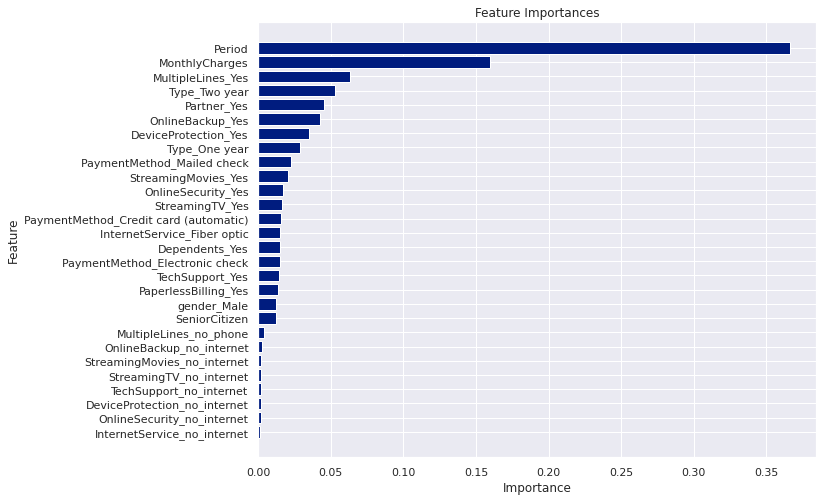

In [44]:


ohe = grid_rf.best_estimator_.named_steps['ohe']
feature_names = ohe.get_feature_names_out()

clf = grid_rf.best_estimator_.named_steps['clf']
importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


Самые важные признаки - время использования услуг и ежемесечная плата. Их важность в несколько раз выше, чем у остальных признаков.

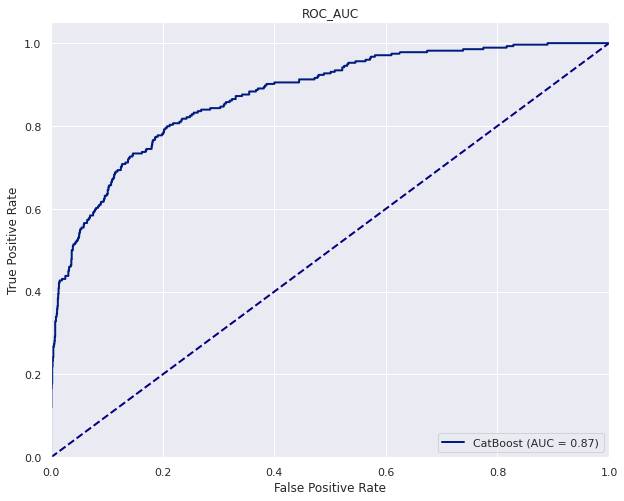

           AUC-ROC  accuracy  precision    recall
CatBoost  0.874905  0.892675    0.85124  0.375912


In [45]:

plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.legend(loc="lower right")
plt.show()

print(pd.DataFrame(model_results).T)


CatBoost показывает наивысшую точность и  лучшую метрик AUC-ROC (87.59%).

# Отчёт о проделанной работе по анализу оттока клиентов

## Выполненные шаги

### Подготовка данных

1. **Изучение и объединение таблиц**:
    - Таблицы были проанализированы и объединены в единую таблицу на основе столбца `customer_id`.

2. **Заполнение пропусков**:
    - Пропуски, возникшие при объединении таблиц и заполнении бинарных признаков, были заполнены третьей категорией.
    - Пропуски в столбце `TotalCharges` у новых клиентов были заполнены значениями `MonthlyCharges`.
    - Пропуски в данных об услугах (телефон, интернет) были заполнены значениями `'no_phone'` и `'no_internet'` соответственно.

3. **Удаление и добавление признаков**:
    - Были удалены признаки дат.
    - Добавлена целевая метка факта ухода (`Left`)

### Исследовательский анализ

1. **Анализ зависимости признаков**:
    - Удалены мультиколлинеарные признаки (`TotalCharges`, 'BeginDate', 'EndDate') 

### Построение и обучение моделей

1. **Модели и кросс-валидация**:
    - Построены и обучены модели: логистической регрессии, случайного леса,  (CatBoostClassifier).
    - Для каждой модели была проведена кросс-валидация и вычислена метрика AUC-ROC, а также другие метрики (accuracy, precision, recall).


### Ключевые шаги в решении задачи

1. **Добавление признаков**:
    - Включение признака продолжительности использования услуг, который оказался наиболее значимым.
  
2. **Исследовательский анализ**:
    - Анализ данных позволил выявить закономерности в поведении клиентов и дать рекомендации без использования машинного обучения.

3. **Обучение и анализ моделей**:
    - Анализ склонности моделей давать ложноположительные и ложноотрицательные ответы позволил выбрать наиболее подходящую модель.

### Итоговая модель

- **Выбранная модель**: CatBoostClassifier с гиперпараметрами:
    - `{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
   
  
- **Метрики итоговой модели**:
    - AUC-ROC: 0.883939
    - Accuracy: 0.896082
    - Precision: 0.882353
    - Recall: 0.383212
   
### Рекомендации заказчику

Нужно разработать программу удержания с персонализированными предложениями и бонусами. Постоянно контролить и анализируйть данные клиентов для оперативной корректировки стратегии работы с ними. Скидки для старых клиентов, либо добавление бесплатных услуг, подарков для старичком.
